In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
print(tf.__version__)

1.15.0


In [0]:
mnist= keras.datasets.fashion_mnist

In [0]:
(training_image,training_label), (test_image,test_label)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
import matplotlib.pyplot as plt
print(training_image.shape)
print(test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
plt.imshow(training_image[10])

In [0]:
print(training_image[4])

In [0]:
training_image = training_image / 255
test_image = test_image / 255


In [0]:
print(training_image.shape)

(60000, 28, 28)


In [0]:
training_image= training_image.reshape(60000,28,28,1)

In [0]:
test_image = test_image.reshape(10000,28,28,1)

In [0]:
print(training_image.shape)

(60000, 28, 28, 1)


In [0]:
#print(training_image[1])
print(training_label[8])

5


In [0]:
print(training_image[4])

In [0]:
model = keras.models.Sequential([keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10,'softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_image, training_label, epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________

In [0]:
model.evaluate(test_image,test_label)

10000/10000 [==============================] - 4s 417us/sample - loss: 0.2405 - acc: 0.9103


[0.2405308268547058, 0.9103]

In [0]:
test_loss,test_accuracy = model.evaluate(test_image,test_label)
print("Test loss: {} \n Test Accuracy: {}".format(test_loss,test_accuracy))

10000/10000 [==============================] - 4s 440us/sample - loss: 0.2405 - acc: 0.9103
Test loss: 0.2405308268547058 
 Test Accuracy: 0.9103000164031982


In [0]:
print("Test loss: {} \nTest Accuracy: {}".format(test_loss,test_accuracy))

Test loss: 0.2405308268547058 
Test Accuracy: 0.9103000164031982


#Visualizing hidden layers (Covolution and pooling)

In [0]:
fig,axis = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1


In [0]:
from keras import models

#####model.layers is used to visualize intermediate layers.

In [0]:
layer_output = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_output)


In [0]:
fig1= activation_model.predict(test_image[FIRST_IMAGE].reshape(1,28,28,1))[2]
print(fig1.shape)

(1, 11, 11, 64)


In [0]:
print(fig1.size)

7744


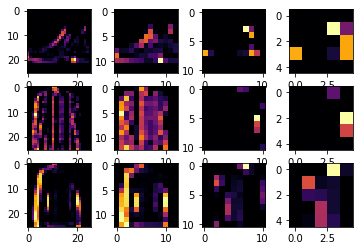

In [0]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 3
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  fig1 = activation_model.predict(test_image[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(fig1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  fig2 = activation_model.predict(test_image[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(fig2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  fig3 = activation_model.predict(test_image[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(fig3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)


In [0]:
model1= keras.models.Sequential([
                                 keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128,activation='relu'),
                                 keras.layers.Dense(10)
                                 ])